# REDUÇÃO DA DIMENSIONALIDADE

Base de dados modificada retirada do Breast Cancer Wisconsin (Diagnostic) Data Set.

Nesse projeto, vamos tentar reduzir o número de dimensões da nossa base de dados com o propósito de aprender como reduzir dimensões sem perder a acurácia do modelo preditivo.

Reduzir as dimensões ajuda a reduzir o custo de processamento, que para alguns modelos mais complexos pode ser muito alto.

A base de dados contém o id do paciente, o diagnóstico se o câncer é benigno (B) ou maligno (M) e o resultado de 33 diferentes exames.

## Parte 1 - Classificadores Random Forest e Dummy

In [1]:
import pandas as pd
import numpy as np

SEED = 412
np.random.seed(SEED)

In [2]:
df = pd.read_csv('exame.csv')

In [3]:
df.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


Sabemos que a dimensão 'id' não tem nenhuma relação com o diagnóstico do câncer e portanto pode ser retirada.

In [4]:
df1 = df.drop(columns=['id'])
df1

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,0.14710,...,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,0.07017,...,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,0.12790,...,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,0.10520,...,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,0.10430,...,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678,0.854454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,0.13890,...,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115,0.158771
565,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,0.09791,...,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637,NaN
566,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,0.05302,...,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820,NaN
567,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,0.15200,...,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400,NaN


Outra coisa que se pode notar é que o campo 'exame_33' tem vários campos nulos, vamos verificar mais a fundo.

In [5]:
df1.isna().sum()

diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [6]:
df1.shape[0]

569

In [7]:
419/569

0.7363796133567663

O campo 'exame_33' tem 73,6% dos campos nulos, e portanto pode ser retirado do modelo.

In [8]:
df2 = df1.drop(columns='exame_33')

Começamos o processo de redução das dimensões, já retiramos o campo 'id' e o campo 'exame_33'.

Vamos agora verificar a acurácia do nosso modelo preditivo para as dimensões que ainda temos, usando o algorítimo Random Forest.

Obs: O modelo Random Forest não permite o uso de uma dimensão com campos vazios, e por isso a dimensão 'exame_33' foi removida antes da construção do modelo

In [9]:
df2.head()

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


In [10]:
x = df2.iloc[:,1:]

In [11]:
x.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


In [12]:
x.shape

(569, 32)

In [13]:
y = df2.diagnostico

In [14]:
y.value_counts()

B    357
M    212
Name: diagnostico, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y)

In [17]:
y_treino.shape

(426,)

In [18]:
y_teste.shape

(143,)

In [19]:
x_treino.shape

(426, 32)

In [20]:
x_teste.shape

(143, 32)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
classificador = RandomForestClassifier(n_estimators=100, random_state=SEED)

In [23]:
classificador.fit(x_treino, y_treino)

RandomForestClassifier(random_state=412)

In [24]:
classificador.score(x_teste, y_teste).round(3)

0.972

In [25]:
from sklearn.dummy import DummyClassifier

In [26]:
classificador_dummy = DummyClassifier(strategy='most_frequent', random_state=SEED)

In [27]:
classificador_dummy.fit(x_treino, y_treino)

DummyClassifier(random_state=412, strategy='most_frequent')

In [28]:
classificador_dummy.score(x_teste, y_teste).round(3)

0.692

Criamos nosso algorítimo base para termos com que comparar no futuro, continuaremos o processo de reduzir as dimensões do conjunto de dados.

Com as atuais dimensões, nosso algorítimo teve 96,5% de acurácia.

## Parte 2 - Violon plot

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

In [30]:
padronizador = StandardScaler()

In [31]:
padronizador.fit(x)

StandardScaler()

In [32]:
x = padronizador.transform(x)
x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [33]:
x1 = pd.DataFrame(x, columns = df2.iloc[:,1:].keys())
x1

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,1.0,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,1.0,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.0,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.0,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.0,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.0,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,1.0,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,1.0,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.0,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,1.0,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,1.0,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.0,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.0,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,1.0,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,1.0,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,1.0,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.0,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,1.0,2.289985,1.919083,2.219635


In [34]:
def graf_violin(y,x,inic,fim):
    dfn = pd.concat([y,x.iloc[:,inic:fim]], axis=1)
    dados_plot = pd.melt(dfn.iloc[:,:], id_vars='diagnostico', var_name='exames', value_name='valores')
    plt.figure(figsize=(15,10))
    sns.violinplot(data=dados_plot, x='exames', y='valores', hue='diagnostico', split=True)
    plt.show()

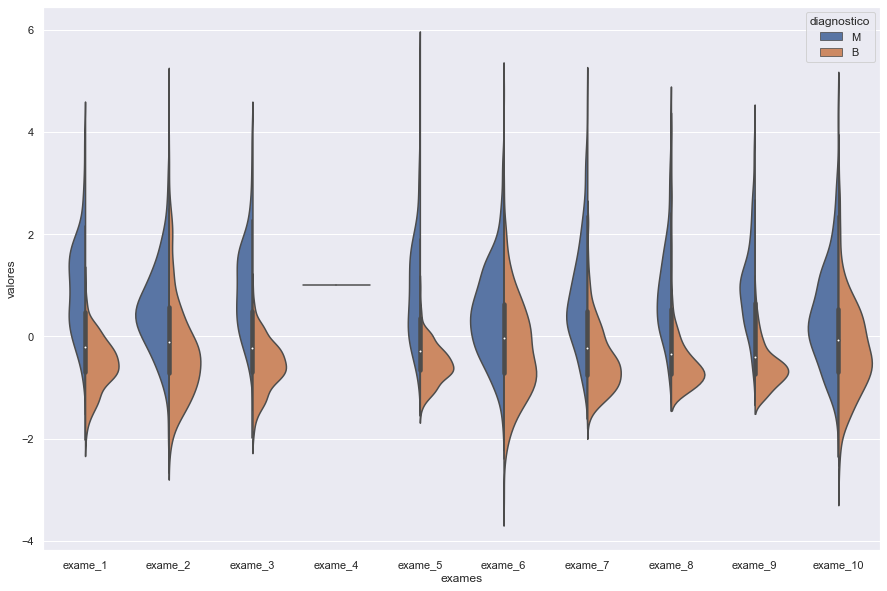

In [35]:
graf_violin(y,x1,0,10)

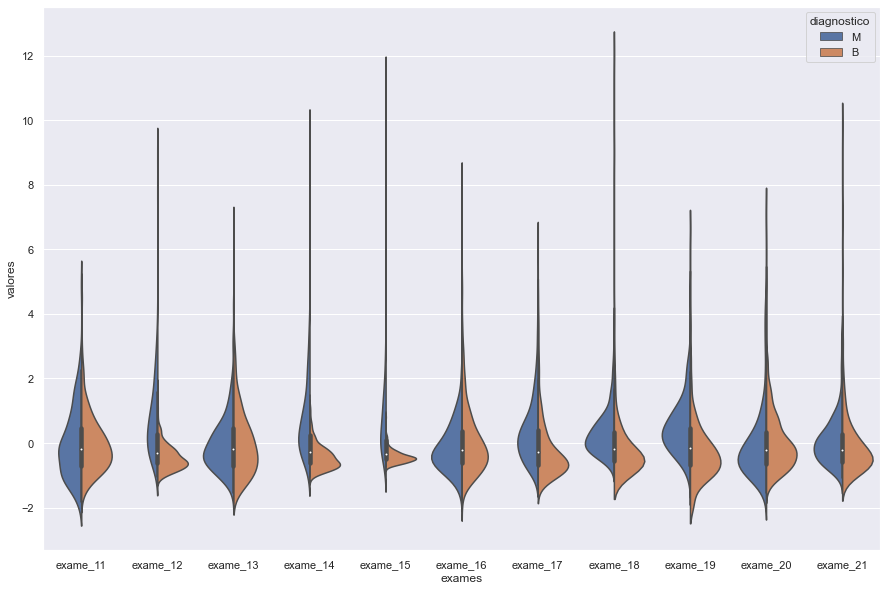

In [36]:
graf_violin(y,x1,10,21)

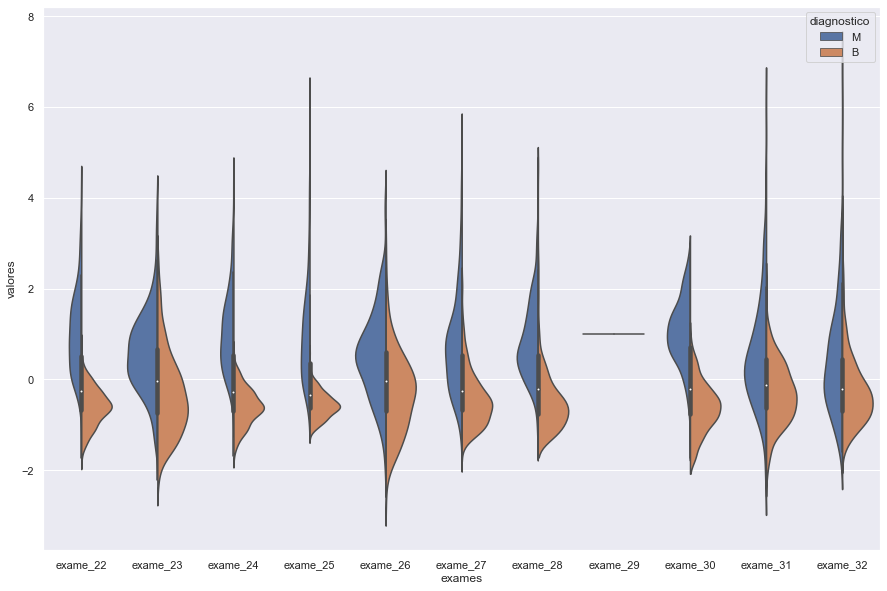

In [37]:
graf_violin(y,x1,21,32)

Conseguimos notar que os valores dos campos 'exame_4' e 'exame_29' são sempre iguais, e portanto não contribuem para o modelo, podendo assim serem descartados, vamos conferir.

In [38]:
df['exame_4'].value_counts()

103.78    569
Name: exame_4, dtype: int64

In [39]:
df['exame_29'].value_counts()

0.786    569
Name: exame_29, dtype: int64

In [40]:
x2 = x1.drop(columns=['exame_4', 'exame_29'])
x2

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


Nessa etapa, com ajuda do gráfico de violino, descartamos mais duas dimensões.

In [41]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x2,y)

In [42]:
from sklearn.ensemble import RandomForestClassifier
classificador = RandomForestClassifier(n_estimators=100, random_state=SEED)
classificador.fit(x_treino, y_treino)
classificador.score(x_teste, y_teste).round(3)

0.951

In [43]:
from sklearn.dummy import DummyClassifier
classificador_dummy = DummyClassifier(strategy='most_frequent', random_state=SEED)
classificador_dummy.fit(x_treino, y_treino)
classificador_dummy.score(x_teste, y_teste).round(3)

0.636

Nota-se que com a retirada das duas dimensões constantes, a acurácia do modelo subiu para 97,2%

## Parte 3 - Correlação

<AxesSubplot:>

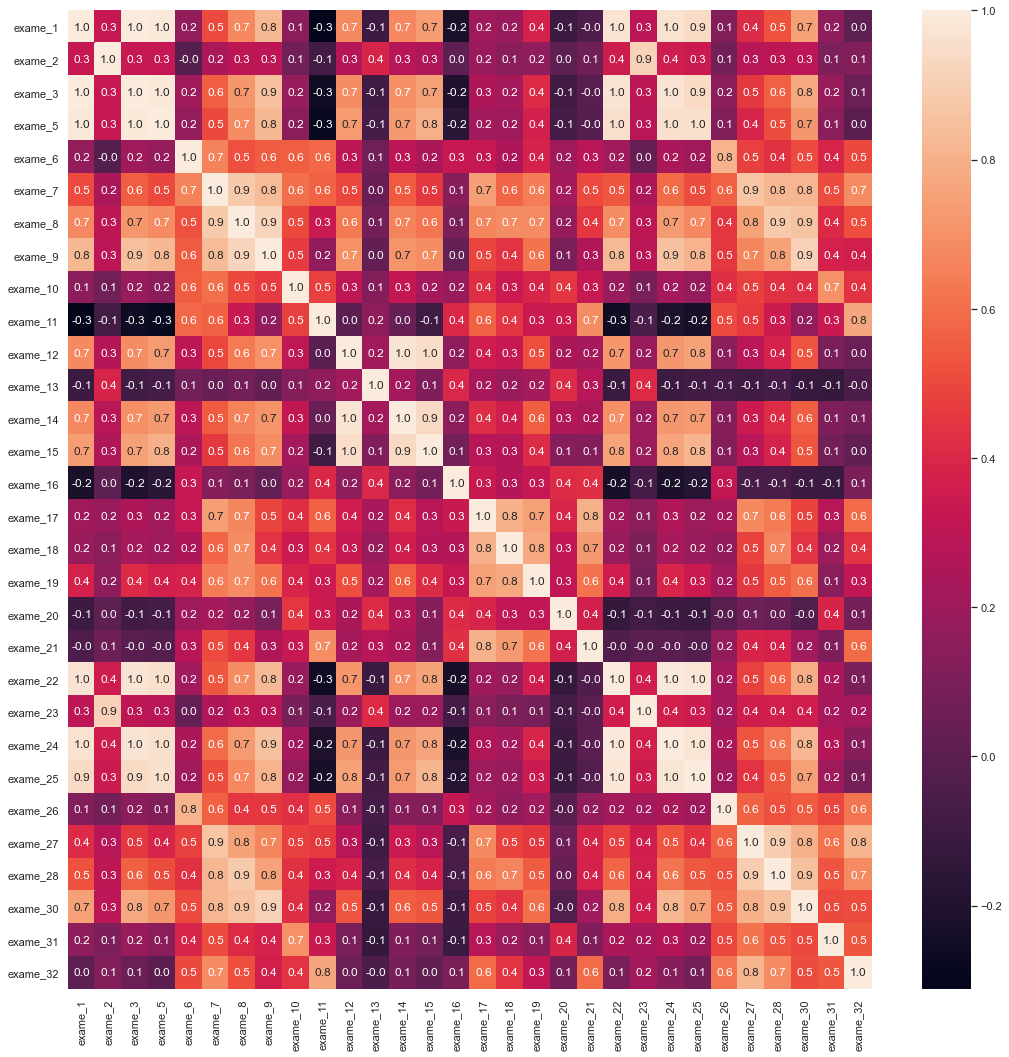

In [44]:
plt.figure(figsize=(18,18))
sns.heatmap(x2.corr(), annot=True, fmt='.1f')

In [45]:
exames_correlacionados = x2.corr()
exames_correlacionados_v1 = exames_correlacionados[exames_correlacionados>0.99]
exames_correlacionados_v1 = exames_correlacionados_v1.sum()

In [46]:
exames_correlacionados_v2 = exames_correlacionados_v1[exames_correlacionados_v1>1]
exames_correlacionados_v2

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

A partir do estudo de correlação, podemos ver que as variáveis 'exame_1' e 'exame_3' estão altamente correlacionadas, assim como as variáveis 'exame_22' e 'exame_24', assim podemos excluir duas delas para reduzir as dimensões do conjunto de dados.

In [47]:
x3 = x2.drop(columns=['exame_3','exame_24'])
x3

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,...,0.167980,1.901185,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,...,-0.490556,1.536720,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,...,0.036727,0.561361,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,...,0.904057,1.961239,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [48]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x3,y)

In [49]:
from sklearn.ensemble import RandomForestClassifier
classificador = RandomForestClassifier(n_estimators=100, random_state=SEED)
classificador.fit(x_treino, y_treino)
classificador.score(x_teste, y_teste).round(3)

0.951

In [50]:
from sklearn.dummy import DummyClassifier
classificador_dummy = DummyClassifier(strategy='most_frequent', random_state=SEED)
classificador_dummy.fit(x_treino, y_treino)
classificador_dummy.score(x_teste, y_teste).round(3)

0.636

Podemos parar um momento para conferir os valores de acurácia do nosso modelo preditivo, com 32 variáveis tinhamos 96,5% de acerto.

Quando retiramos as duas dimensões com valores constantes, a taxa de acerto subiu para 97,2%

Agora, retirando as duas varíaveis correlacionadas, temos 95,8%.

## Parte 4 - Selecionando melhores features

In [51]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [52]:
kbest = SelectKBest(chi2, k=5)

In [53]:
x4 = df2.drop(columns=['diagnostico', 'exame_3', 'exame_4', 'exame_24', 'exame_29'])
x4.head()

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,17.99,10.38,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,...,0.006193,25.38,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,...,0.003532,24.99,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,...,0.004571,23.57,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,...,0.009208,14.91,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,...,0.005115,22.54,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [54]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x4,y, test_size=0.3, random_state=SEED)

In [55]:
kbest.fit(x_treino, y_treino)

SelectKBest(k=5, score_func=<function chi2 at 0x00000217E0F53A60>)

In [56]:
treino_kbest = kbest.transform(x_treino)

In [57]:
teste_kbest = kbest.transform(x_teste)

In [58]:
treino_kbest.shape

(398, 5)

In [59]:
from sklearn.ensemble import RandomForestClassifier
classificador = RandomForestClassifier(n_estimators=100, random_state=SEED)
classificador.fit(treino_kbest, y_treino)
classificador.score(teste_kbest, y_teste).round(3)

0.93

In [60]:
from sklearn.dummy import DummyClassifier
classificador_dummy = DummyClassifier(strategy='most_frequent', random_state=SEED)
classificador_dummy.fit(treino_kbest, y_treino)
classificador_dummy.score(teste_kbest, y_teste).round(3)

0.673

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
confusion_mat = confusion_matrix(y_teste, classificador.predict(teste_kbest))
confusion_mat

array([[111,   4],
       [  8,  48]], dtype=int64)

[Text(0.5, 30.5, 'Predição'), Text(48.5, 0.5, 'Real')]

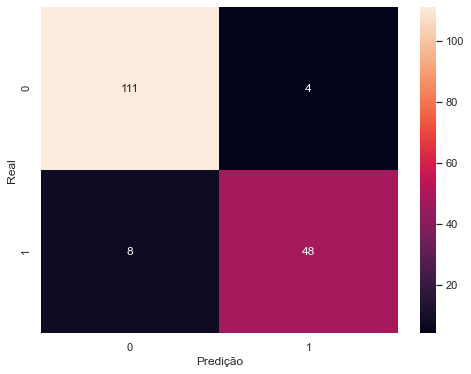

In [63]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_mat, annot=True, fmt='d').set(xlabel='Predição', ylabel='Real')

Utilizamos um algorítimo automático de remoção de dimensões, o KBest, ao escolhermos um número N de dimensões que queremos trabalhar, o algorítimo cria uma sistema de pontuação de dimensões e retorna as N melhores dimensões.

Para este modelo, escolhemos 5 dimensões.

In [64]:
from sklearn.feature_selection import RFE

In [65]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x4,y, test_size=0.3, random_state=SEED)

In [66]:
from sklearn.ensemble import RandomForestClassifier
classificador = RandomForestClassifier(n_estimators=100, random_state=SEED)
classificador.fit(x_treino, y_treino)

RandomForestClassifier(random_state=412)

In [67]:
select_rfe = RFE(estimator=classificador, n_features_to_select= 5, step=1)
select_rfe.fit(x_treino, y_treino)
treino_rfe = select_rfe.transform(x_treino)
teste_rfe = select_rfe.transform(x_teste)
classificador.fit(treino_rfe, y_treino)
classificador.score(teste_rfe, y_teste)

0.9590643274853801

In [68]:
from sklearn.dummy import DummyClassifier
classificador_dummy = DummyClassifier(strategy='most_frequent', random_state=SEED)
classificador_dummy.fit(treino_rfe, y_treino)
classificador_dummy.score(teste_rfe, y_teste).round(3)

0.673

In [69]:
confusion_mat = confusion_matrix(y_teste, classificador.predict(teste_rfe))
confusion_mat

array([[110,   5],
       [  2,  54]], dtype=int64)

[Text(0.5, 30.5, 'Predição'), Text(48.5, 0.5, 'Real')]

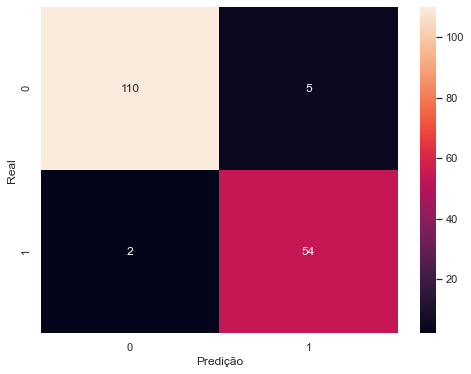

In [70]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_mat, annot=True, fmt='d').set(xlabel='Predição', ylabel='Real')

O algorítimo RFE faz a mesma coisa que o KBest, porém trouxe um resultado um pouco melhor.

A acurácia do modelo escolhendo 5 dimensões com o KBest foi de 93% enquanto que com o RFE foi de 95,3%

In [71]:
from sklearn.feature_selection import RFECV

In [72]:
from sklearn.ensemble import RandomForestClassifier
classificador = RandomForestClassifier(n_estimators=100, random_state=SEED)
classificador.fit(x_treino, y_treino)

RandomForestClassifier(random_state=412)

In [73]:
select_rfecv = RFECV(estimator=classificador, cv=5, step=1, scoring='accuracy')
select_rfecv.fit(x_treino, y_treino)
treino_rfecv = select_rfecv.transform(x_treino)
teste_rfecv = select_rfecv.transform(x_teste)
classificador.fit(treino_rfecv, y_treino)
classificador.score(teste_rfecv, y_teste)

0.9766081871345029

In [74]:
from sklearn.dummy import DummyClassifier
classificador_dummy = DummyClassifier(strategy='most_frequent')
classificador_dummy.fit(treino_rfecv, y_treino)
classificador_dummy.score(teste_rfecv, y_teste).round(3)

0.673

In [75]:
confusion_mat = confusion_matrix(y_teste, classificador.predict(teste_rfecv))
confusion_mat

array([[112,   3],
       [  1,  55]], dtype=int64)

[Text(0.5, 30.5, 'Predição'), Text(48.5, 0.5, 'Real')]

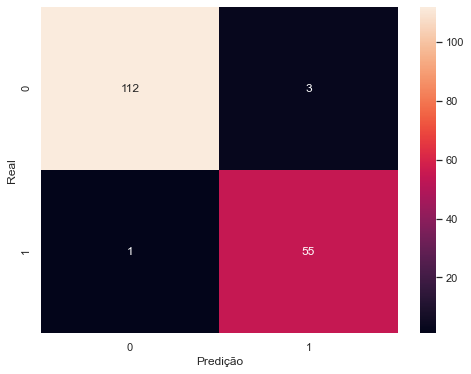

In [76]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_mat, annot=True, fmt='d').set(xlabel='Predição', ylabel='Real')

In [77]:
select_rfecv.n_features_

10

In [78]:
select_rfecv.support_

array([ True, False,  True, False, False,  True,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True,  True, False, False,  True,  True, False,
       False])

In [79]:
x_treino.columns[select_rfecv.support_]

Index(['exame_1', 'exame_5', 'exame_8', 'exame_9', 'exame_15', 'exame_22',
       'exame_23', 'exame_25', 'exame_28', 'exame_30'],
      dtype='object')

In [80]:
import matplotlib.pyplot as plt

In [81]:
len(select_rfecv.grid_scores_)

28

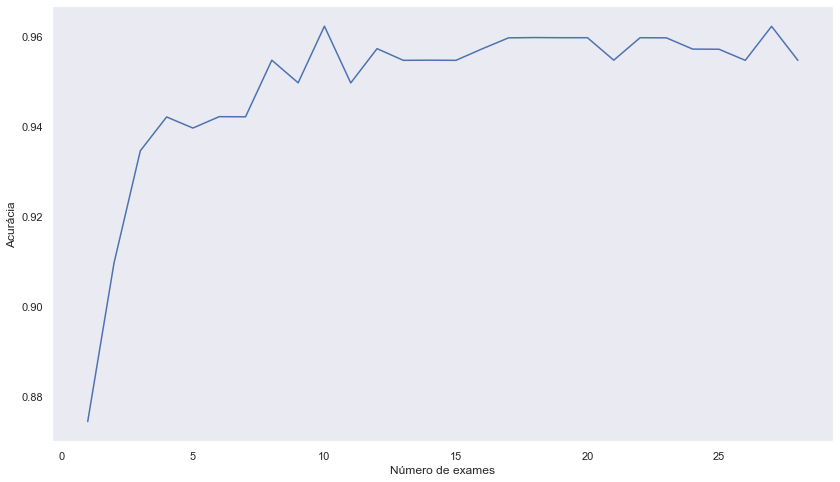

In [82]:
plt.figure(figsize=(14,8))
plt.xlabel('Número de exames')
plt.ylabel('Acurácia')
plt.grid()
plt.plot(range(1, len(select_rfecv.grid_scores_)+1), select_rfecv.grid_scores_)
plt.show()

O algorítimo RFECV, diferente do RFE e do KBest, ele separa todas as dimensões em blocos e aplica o algorítimo RFE em cada um desses blocos, procurando a melhor combinação.

Além disso, o RFECV consegue nos mostrar qual é o número de dimensões que maximiza a acurácia do modelo e quais dimensões seriam elas.

O RFECV tem um custo de processamento mais elevado, mas podemos ver que trouxe um resultado melhor.

Vamos criar um resumo dos nossos resultados até aqui.

<br>

Retiramos a dimensão 'id' que não está relacionada com o diagnóstico e a dimensão 'exame_33' que havia 73% de valores nulos.<br>
<b>Taxa de acerto:</b> 97,2%

Retiramos duas dimensões, 'exame_4' e 'exame_29', em que todos os valores eram iguais.<br>
<b>Taxa de acerto:</b> 95,1%

Retiramos duas dimensões, 'exame_3' e 'exame_22', que eram altamente correlacionadas com outras dimensões.<br>
<b>Taxa de acerto:</b> 95,1%

Usando o algorítimo KBest para selecionar 5 dimensões.<br>
<b>Taxa de acerto:</b> 93,0%

Usando o algorítimo RFE para selecionar 5 dimensões.<br>
<b>Taxa de acerto:</b> 95,9%

Usando o algorítimo RFECV, o algorítimo selecionou 10 dimensões que maximizavam a acurácia.<br>
<b>Taxa de acerto:</b> 97,7%

<br>

Nossa maior acurácia foi com 10 dimensões, conseguimos acertar 97,7%

E com 5 dimensões, acertamos 95,9%